In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\user\Desktop\research_dataset\thyroid.csv")

In [3]:
df

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,-[870119027]


In [4]:
df.drop("other",axis=1,inplace=True)

In [5]:
feature_columns= ["age",
                "sex",
                "on_thyroxine",
                "query_on_thyroxine",
                "on_antithyroid_medication",
                "sick",
                "pregnant",
                "thyroid_surgery",
                "I131_treatment",
                "query_hypothyroid",
                "query_hyperthyroid",
                "lithium",
                "goitre",
                "tumor",
                "hypopituitary",
                "psych",
                "TSH measured",
                "TSH",
                "T3_measured",
                "T3",
                "TT4_measured",
                "TT4",
                "T4U_measured",
                "T4U",
                "FTI_measured",
                "FTI",
                "TBG_measured",
                "TBG",
               "target"]


In [6]:
df.columns=feature_columns

In [7]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,?,t,64,t,0.83,t,77,f,?,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,?,t,91,t,0.92,t,99,f,?,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,?,t,113,t,1.27,t,89,f,?,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,?,t,75,t,0.85,t,88,f,?,-[870119027]


#### Splitting Targets

In [8]:

df['target'] = df['target'].str.extract('([A-Za-z]+)', expand=False).fillna('Y')


In [9]:
unique_values = df['target'].unique()
print(unique_values)


['Y' 'S' 'F' 'AK' 'R' 'I' 'M' 'N' 'G' 'K' 'A' 'KJ' 'L' 'MK' 'Q' 'J' 'C'
 'O' 'LJ' 'H' 'D' 'GK' 'MI' 'P' 'FK' 'B' 'GI' 'GKJ' 'OI' 'E']


In [10]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,Y
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,Y
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,Y
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,?,t,64,t,0.83,t,77,f,?,Y
9167,22,M,f,f,f,f,f,f,f,f,...,?,t,91,t,0.92,t,99,f,?,Y
9168,69,M,f,f,f,f,f,f,f,f,...,?,t,113,t,1.27,t,89,f,?,I
9169,47,F,f,f,f,f,f,f,f,f,...,?,t,75,t,0.85,t,88,f,?,Y


#### this case the null values are marked as in '?'

In [11]:
df = df.applymap(lambda x: np.nan if x == '?' else x)

In [12]:
df.isnull().sum()

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3_measured                     0
T3                           2603
TT4_measured                    0
TT4                           441
T4U_measured                    0
T4U                           808
FTI_measured                    0
FTI                           801
TBG_measured                    0
TBG                          8822
target                          0
dtype: int64

#### feautre rows which is not useful

In [13]:
columns_to_drop = ['TBG_measured', 'TBG', 'T3_measured', 'TSH measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']
df.drop(columns_to_drop, axis=1, inplace=True)


In [14]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128,NaN,NaN,Y
1,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Y
2,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Y
3,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,S
4,60,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,64,0.83,77,Y
9167,22,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,91,0.92,99,Y
9168,69,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,113,1.27,89,I
9169,47,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,75,0.85,88,Y


In [15]:
df.isnull().sum()

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
target                          0
dtype: int64

In [16]:
df['sex'] = df['sex'].map({'F': 2, 'M': 1})


In [17]:
df['sex'].fillna(round(df['sex'].mean()), inplace=True)


In [18]:
df.sex.unique()

array([2., 1.])

In [19]:
df.isnull().sum()

age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
target                          0
dtype: int64

#### impute the null values with knn imputer

In [20]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=3)

In [21]:


cols = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']


for i in cols:
    df[i] = knnimp.fit_transform(df[[i]])[:, 0]


In [22]:
df.isnull().sum() 

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
target                       0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9171 non-null   int64  
 1   sex                        9171 non-null   float64
 2   on_thyroxine               9171 non-null   object 
 3   query_on_thyroxine         9171 non-null   object 
 4   on_antithyroid_medication  9171 non-null   object 
 5   sick                       9171 non-null   object 
 6   pregnant                   9171 non-null   object 
 7   thyroid_surgery            9171 non-null   object 
 8   I131_treatment             9171 non-null   object 
 9   query_hypothyroid          9171 non-null   object 
 10  query_hyperthyroid         9171 non-null   object 
 11  lithium                    9171 non-null   object 
 12  goitre                     9171 non-null   object 
 13  tumor                      9171 non-null   objec

#### Data Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_8332\3115213143.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


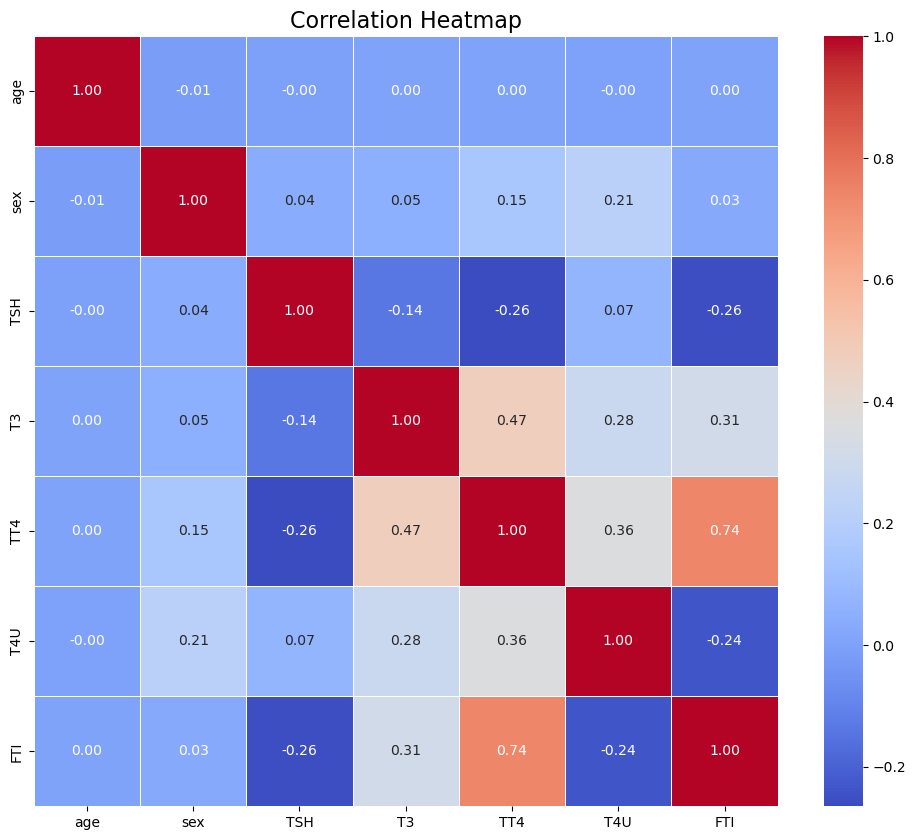

In [24]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [25]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_8332\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,sex,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.014175,-0.003979,0.003693,0.004122,-0.002045,0.004108
sex,-0.014175,1.000000,0.036723,0.048890,0.150479,0.214723,0.030149
TSH,-0.003979,0.036723,1.000000,-0.136613,-0.264756,0.072962,-0.257901
T3,0.003693,0.048890,-0.136613,1.000000,0.471792,0.281336,0.312401
TT4,0.004122,0.150479,-0.264756,0.471792,1.000000,0.362280,0.738279
T4U,-0.002045,0.214723,0.072962,0.281336,0.362280,1.000000,-0.238927
FTI,0.004108,0.030149,-0.257901,0.312401,0.738279,-0.238927,1.000000


#### for categorial object , we have to do label encoder

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
cols = df.select_dtypes(include=['object']).columns


In [28]:


le = LabelEncoder()

for col in df.select_dtypes(include=['object']):
    try:
        df[col] = le.fit_transform(df[col])
    except Exception as e:
        print(f"An error occurred for column {col}: {e}")
        continue


In [29]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        correlation_coefficient = df.corr().iloc[a, b]
        if correlation_coefficient >= 0.7:
            print(f"Columns '{df.corr().columns[a]}' and '{df.corr().columns[b]}' have correlation coefficient: {correlation_coefficient}")


Columns 'FTI' and 'TT4' have correlation coefficient: 0.7382787596909272


In [30]:
df.drop('TT4',axis=1,inplace=True)
df.drop('FTI',axis=1,inplace=True)


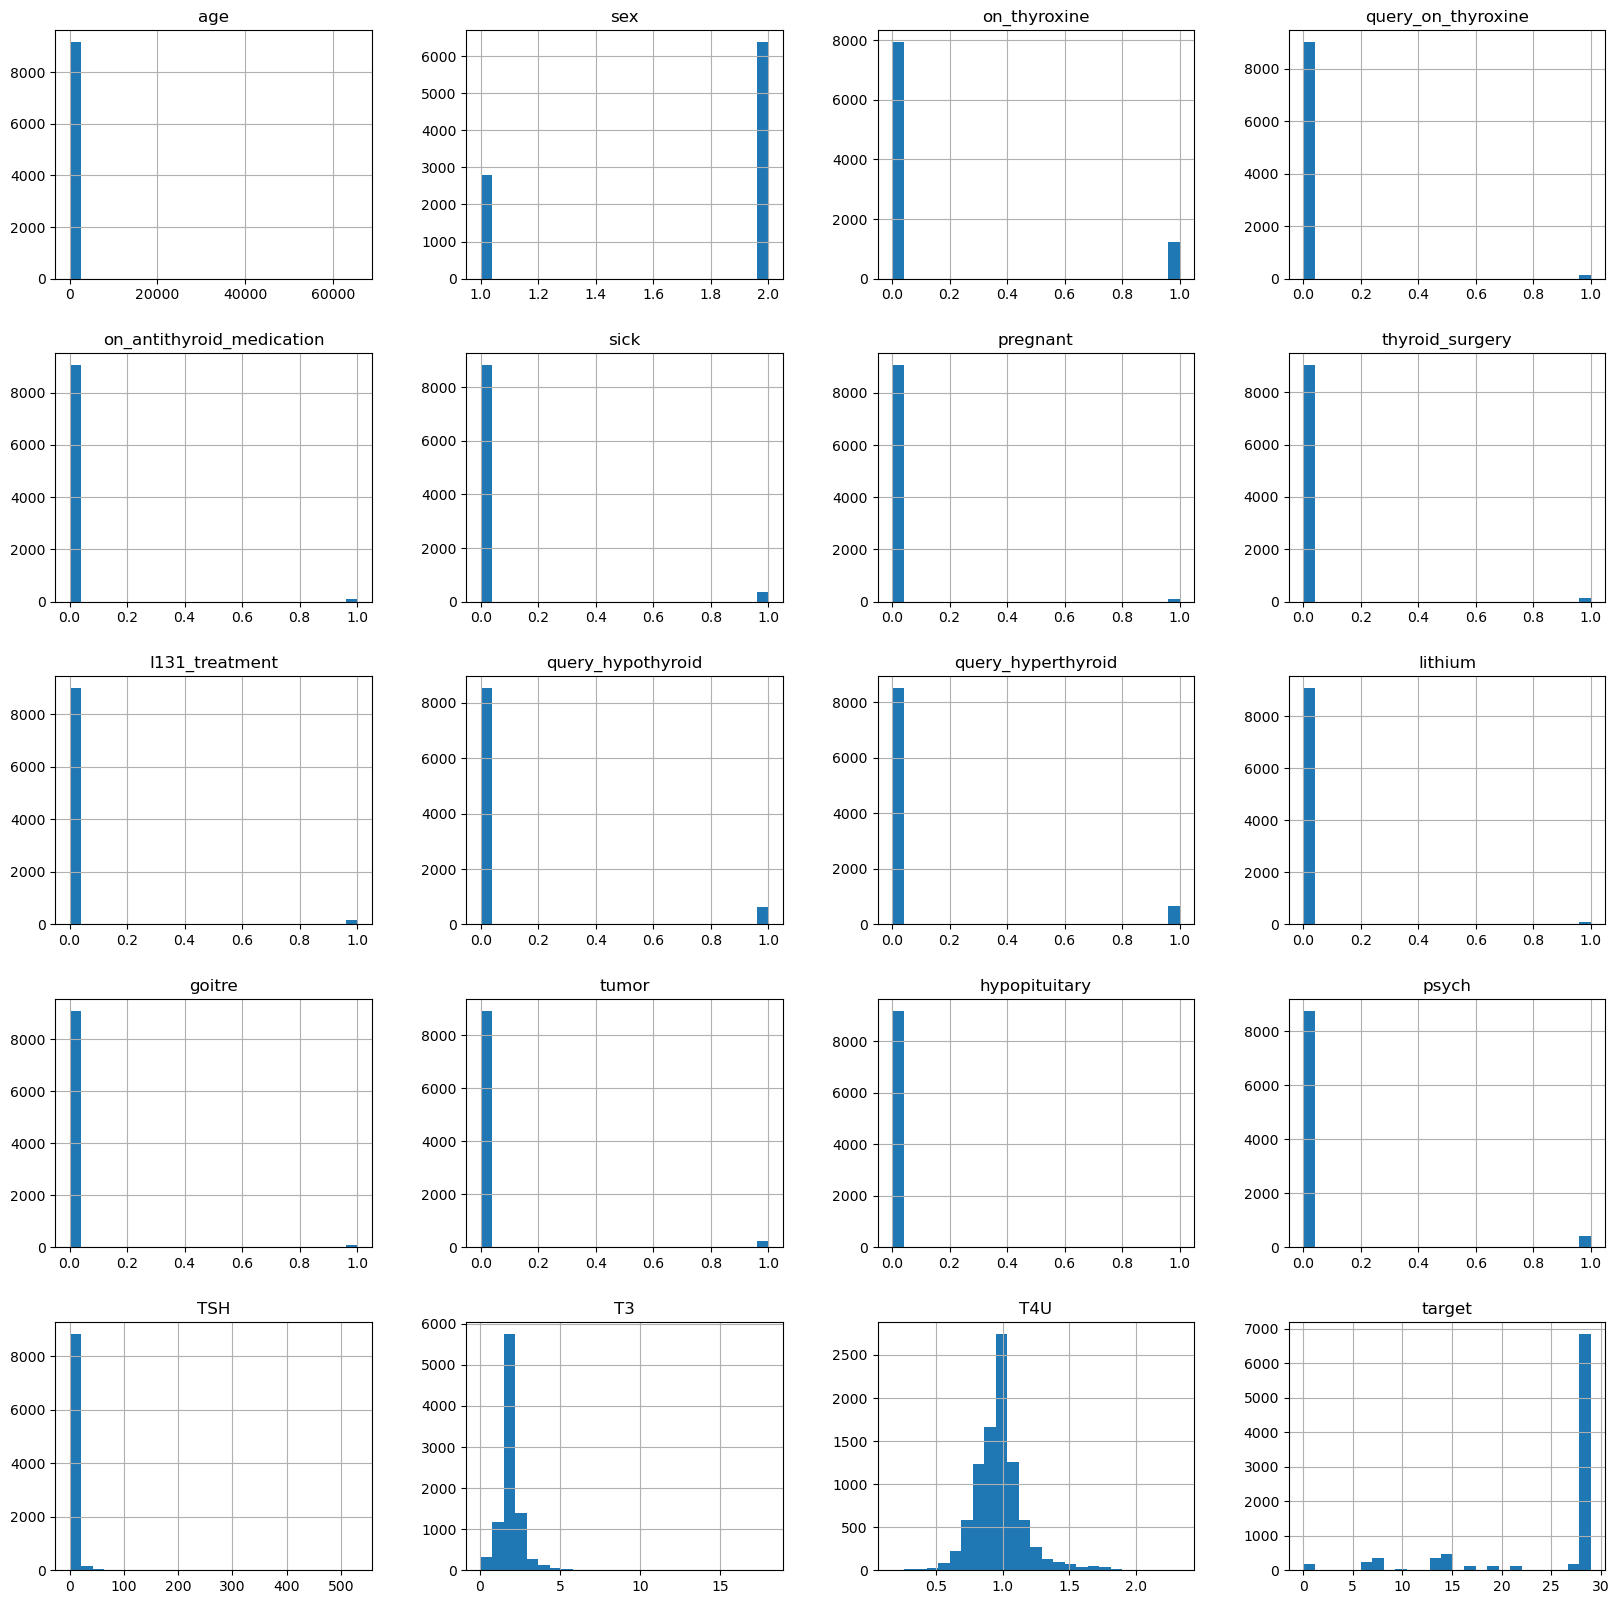

In [31]:
df.hist(bins=25,figsize=(20,20));

#### preprocessing techniques

In [32]:
X = df.drop('target',axis=1)
y = df.target
df2 = X

In [33]:
y.unique()

array([29, 28,  6,  1, 27, 13, 19, 22,  8, 15,  0, 16, 17, 21, 26, 14,  3,
       23, 18, 12,  4, 10, 20, 25,  7,  2,  9, 11, 24,  5])

#### PCA Technique

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [35]:
v = pca.fit_transform(X)

In [36]:

num_components = 10  

X_pca = pd.DataFrame(data=v, columns=[f'component_{i+1}' for i in range(num_components)])


In [37]:
X_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,-44.560402,-3.621894,-0.071759,-0.277418,-0.187788,-0.101193,-0.011291,-0.036827,-0.054225,0.025318
1,-32.560678,-0.002527,0.073974,-0.306726,-0.251368,0.769870,-0.459961,0.084916,0.004565,0.035566
2,-37.560682,-0.002712,0.014065,-0.268551,-0.187090,-0.105037,-0.009696,-0.037687,-0.052517,0.034009
3,-41.560682,-0.003022,0.014072,-0.268528,-0.187095,-0.105023,-0.009705,-0.037690,-0.052519,0.034009
4,-13.560682,-0.000852,0.014020,-0.268687,-0.187058,-0.105119,-0.009647,-0.037670,-0.052506,0.034008
...,...,...,...,...,...,...,...,...,...,...
9166,-17.560672,-0.002185,0.003052,0.680388,-0.077381,0.842177,-0.453805,0.039137,-0.004048,0.075204
9167,-51.560676,-0.004563,-0.049425,0.710605,-0.012736,-0.033802,-0.002681,-0.082536,-0.058838,-0.012080
9168,-4.560676,-0.000708,-0.020822,0.678750,-0.011097,-0.038529,0.000989,-0.078803,-0.049851,-0.345463
9169,-26.560682,-0.001935,0.003711,-0.257237,-0.187644,-0.103431,-0.010961,-0.039012,-0.055741,0.154079


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in X_pca.columns:
    X_pca[col] = scaler.fit_transform(X_pca[[col]])


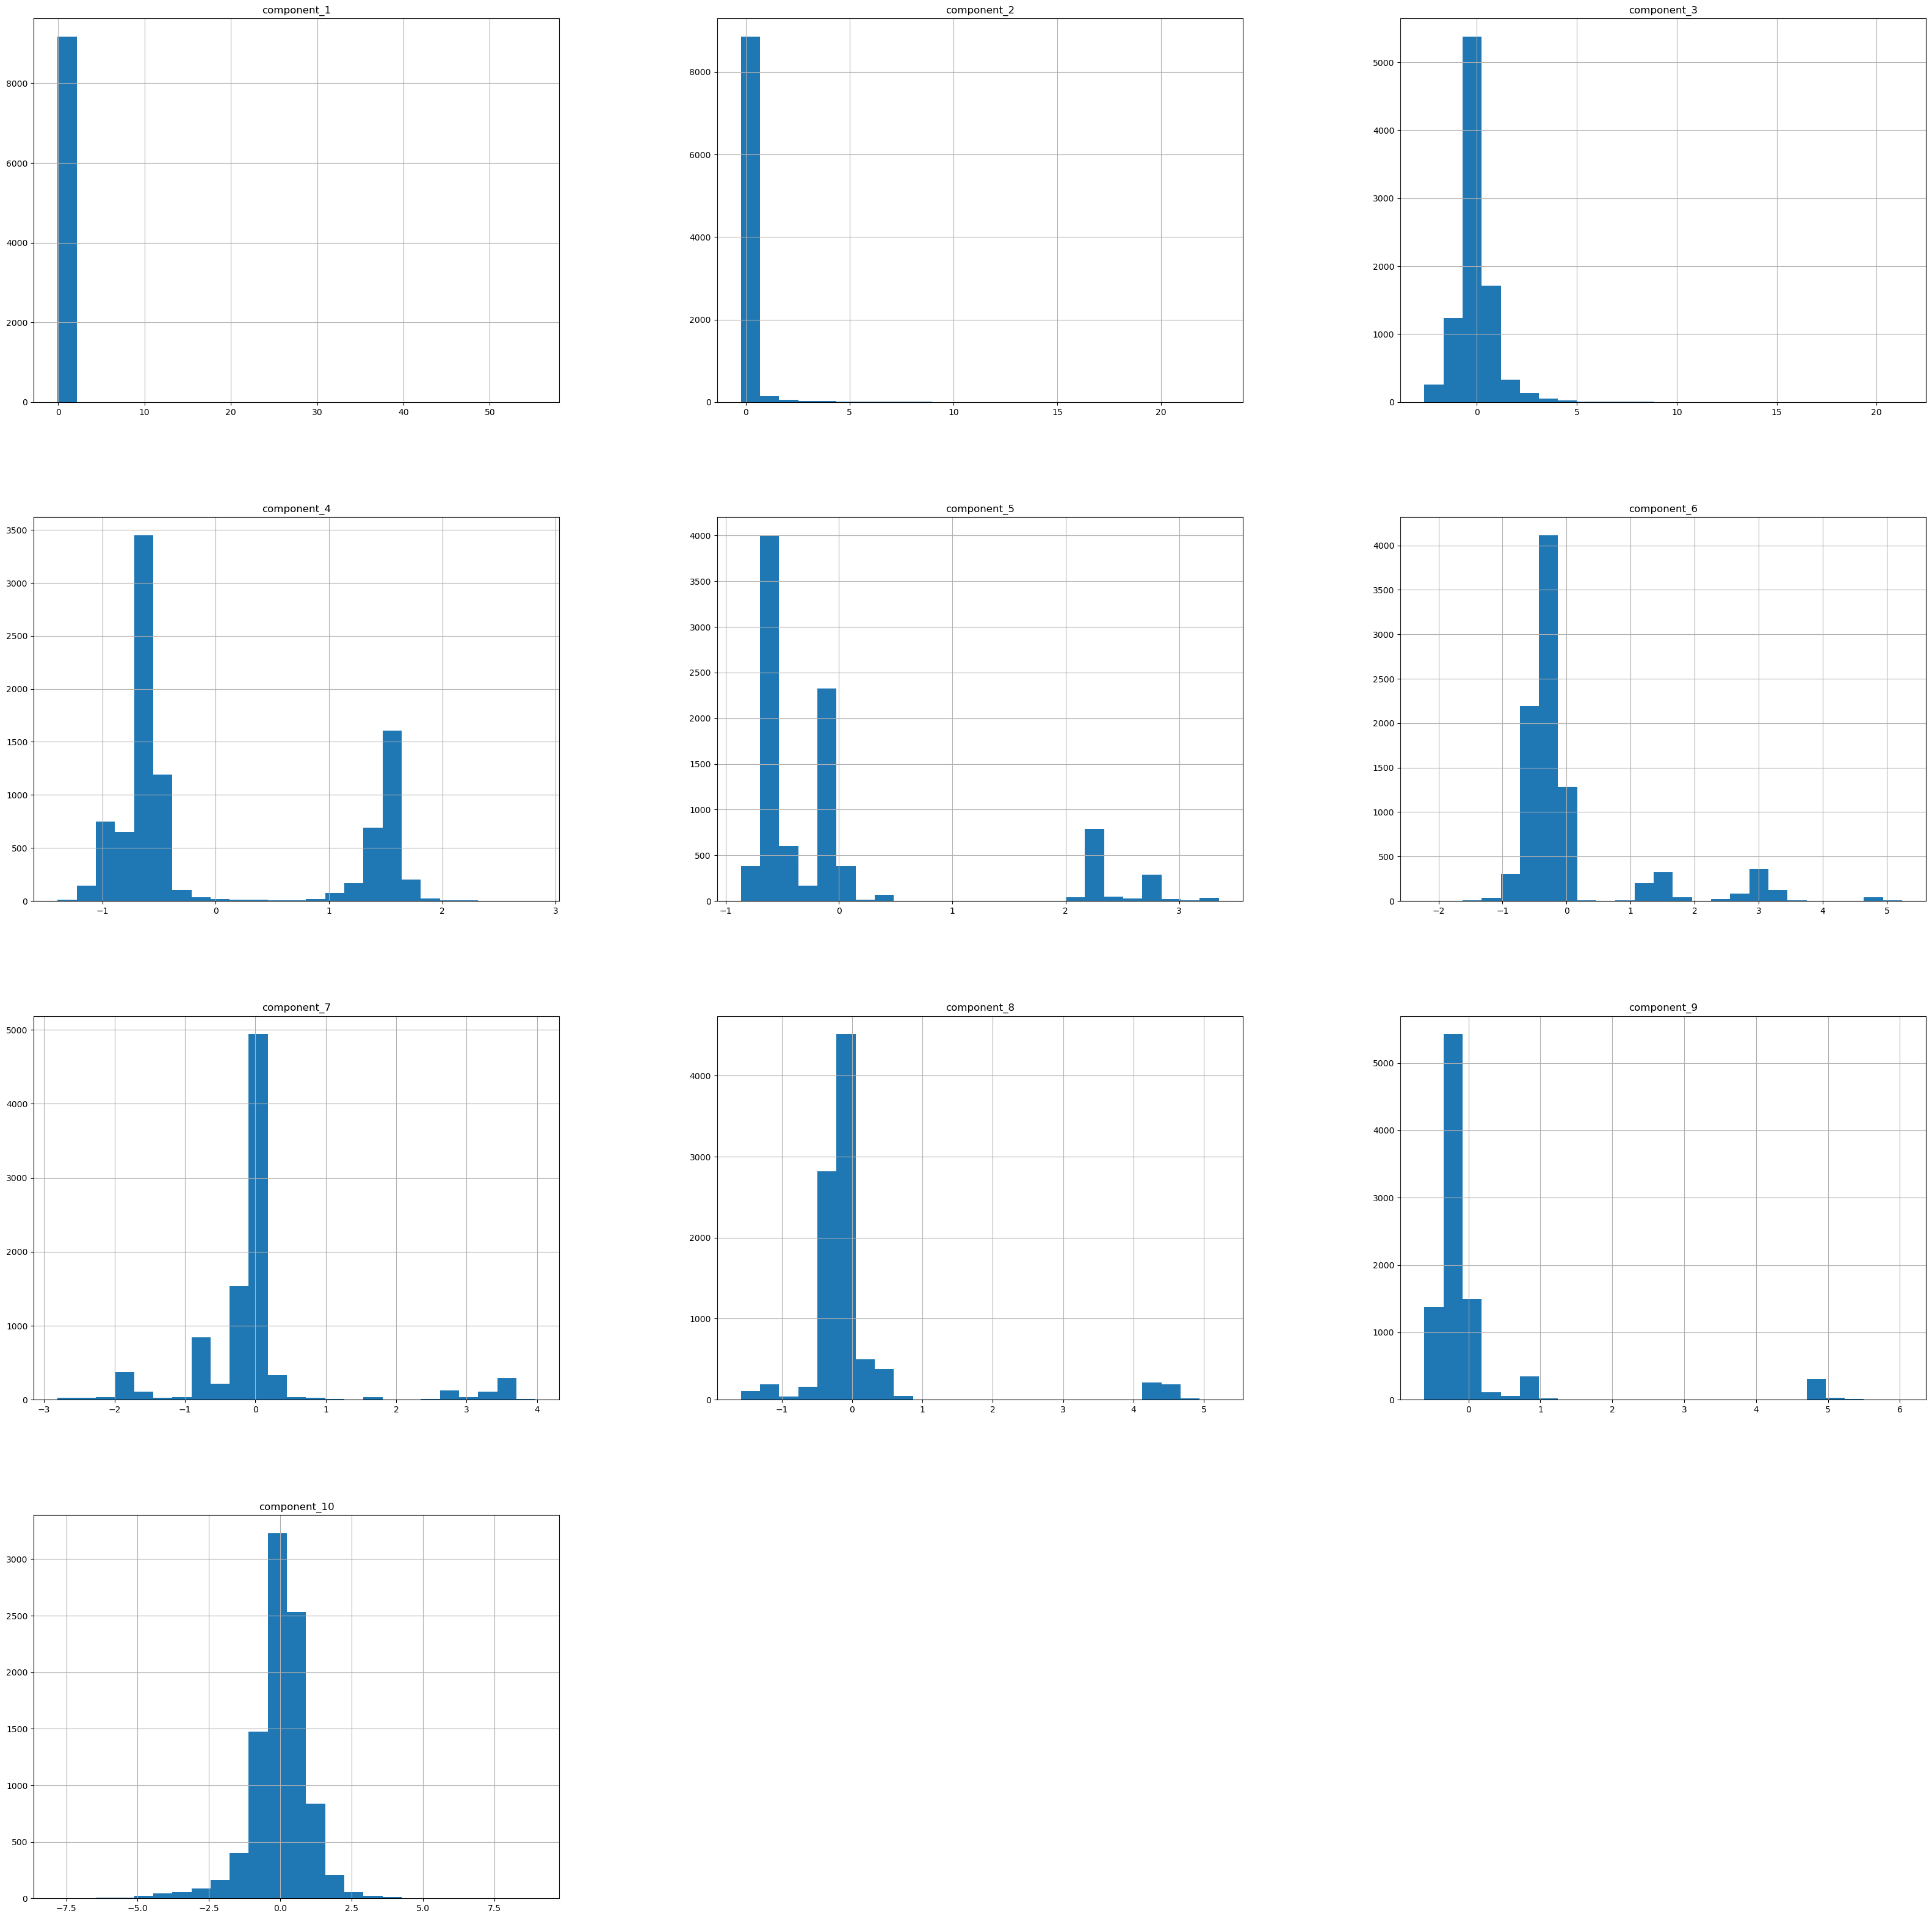

In [40]:
X_pca.hist(bins=25,figsize=(40,40));

In [41]:
X_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,-0.037636,-0.157152,-0.095835,-0.596508,-0.550912,-0.396191,-0.045769,-0.178081,-0.287838,0.140220
1,-0.027501,-0.000110,0.098793,-0.659528,-0.737436,3.014193,-1.864417,0.410627,0.024234,0.196980
2,-0.031724,-0.000118,0.018783,-0.577442,-0.548863,-0.411239,-0.039304,-0.182243,-0.278770,0.188353
3,-0.035103,-0.000131,0.018793,-0.577394,-0.548879,-0.411185,-0.039337,-0.182257,-0.278780,0.188353
4,-0.011454,-0.000037,0.018724,-0.577736,-0.548770,-0.411564,-0.039105,-0.182160,-0.278715,0.188351
...,...,...,...,...,...,...,...,...,...,...
9166,-0.014832,-0.000095,0.004077,1.462981,-0.227013,3.297293,-1.839467,0.189254,-0.021489,0.416508
9167,-0.043549,-0.000198,-0.066008,1.527955,-0.037363,-0.132343,-0.010867,-0.399116,-0.312322,-0.066901
9168,-0.003852,-0.000031,-0.027808,1.459459,-0.032554,-0.150848,0.004011,-0.381065,-0.264618,-1.913294
9169,-0.022433,-0.000084,0.004956,-0.553114,-0.550487,-0.404952,-0.044431,-0.188648,-0.295887,0.853346


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


#### model selection

In [43]:
from sklearn.metrics import accuracy_score

#### Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier


In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [46]:
param_grid = {"criterion" : ["gini", "entropy"],
              "splitter" :   ["best", "random"],
              "max_depth" : [8, 16, 32, 64, 128, None],
              "max_features" : ['sqrt', 'log2', None]
             }

DTC = DecisionTreeClassifier(random_state = 0, max_features = "auto")

# run grid search
grid_search_ABC = GridSearchCV(DTC, param_grid=param_grid, scoring = 'accuracy')

grid_search_ABC.fit(X_train, y_train)

grid_search_ABC.best_params_

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'splitter': 'best'}

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=8,random_state = 0, max_features = None, 
                              criterion = 'entropy' )
tree.fit(X_train, y_train)
#clf = tree.fit(X_train,y_train)
treepredict = tree.predict(X_test)



In [48]:
accuracy_score(treepredict,y_test)
#print(f"Accuracy Score: {accuracy}")

0.8408719346049046

#### Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier


In [100]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [102]:
param_grid = {"criterion" : ["gini", "entropy"],
              "max_features" : ['sqrt', 'log2'],
              "max_depth" : [8, 16, 32, 64, 128],
              "n_estimators" : [25, 50, 75, 100]
             }

clf = RandomForestClassifier()

# run grid search
grid_search_ABC = GridSearchCV(clf, param_grid=param_grid, scoring = 'accuracy')

grid_search_ABC.fit(X_train, y_train)

grid_search_ABC.best_params_

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 75}

In [103]:
clf = RandomForestClassifier(criterion = 'entropy', max_features = 'log2', max_depth = 8, n_estimators = 75)

clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=75)

In [104]:
y_pred = clf.predict(X_test)
y_pred

array([15, 29, 15, ..., 29, 29,  0])

In [105]:
y_pred = y_pred.astype(int)

y_test = y_test.astype(int)

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(max_depth=8, n_estimators=75)
rclf = rf.fit(X_train, y_train)
rfpred = rclf.predict(X_test)

accuracy = accuracy_score(rfpred, y_test)
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.852316076294278


#### K-NN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

param_grid = {"n_neighbors" : [30, 60, 90, 120, 150, 180]
             }

clf = KNeighborsClassifier()

# run grid search
grid_search_ABC = GridSearchCV(clf, param_grid=param_grid, scoring = 'accuracy')

grid_search_ABC.fit(X_train, y_train)

grid_search_ABC.best_params_


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'n_neighbors': 30}

In [57]:
clf = KNeighborsClassifier(n_neighbors = 30)


clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [58]:
y_pred = clf.predict(X_test)
y_pred

array([15, 29, 29, ..., 29, 29,  0])

In [60]:
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)

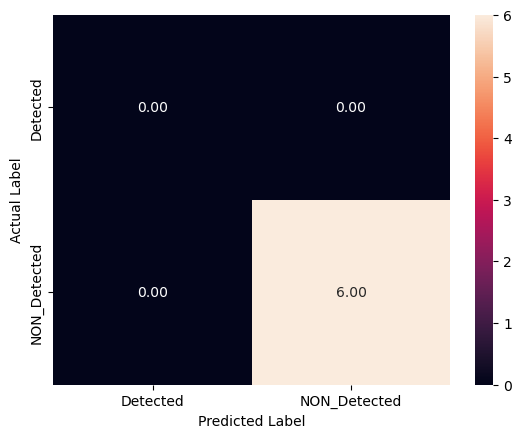

              precision    recall  f1-score   support

           0       0.67      0.23      0.34        26
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           6       0.87      0.51      0.64        53
           7       0.00      0.00      0.00         1
           8       0.62      0.18      0.28        73
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         1
          13       0.61      0.55      0.58        69
          14       0.00      0.00      0.00         9
          15       0.63      0.66      0.65        92
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00        21
          19       0.43      0.12      0.19        24
          21       0.00      0.00      0.00         5
          22       0.00    

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, labels=[1, 0])
    sn.heatmap(cm, annot=True, fmt='.2f',
              xticklabels=['Detected', 'NON_Detected'],
              yticklabels=['Detected', 'NON_Detected'])
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Example usage
draw_cm(y_test, y_pred)
print(classification_report(y_test, y_pred))


#### SVM

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

param_grid = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}

clf = SVC(random_state = 0)

# run grid search
grid_search_ABC = GridSearchCV(clf, param_grid=param_grid, scoring = 'accuracy')

grid_search_ABC.fit(X_train, y_train)

grid_search_ABC.best_params_




C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'kernel': 'linear'}

In [71]:
clf = SVC(random_state = 0, kernel = 'linear')


clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [72]:
y_pred = clf.predict(X_test)
y_pred

array([15, 29, 15, ..., 29, 29, 29])

In [73]:
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)

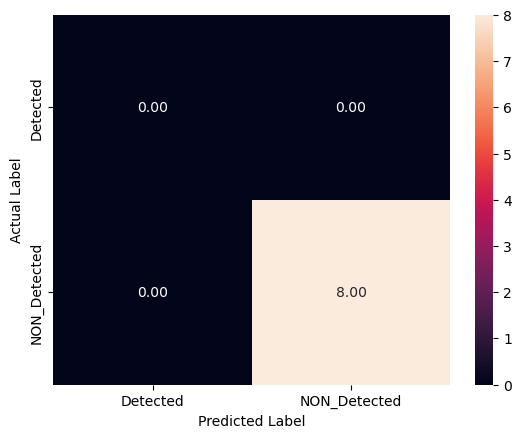

              precision    recall  f1-score   support

           0       0.67      0.31      0.42        26
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           6       0.85      0.66      0.74        53
           7       0.00      0.00      0.00         1
           8       0.67      0.44      0.53        73
           9       0.00      0.00      0.00         5
          10       1.00      0.22      0.36         9
          12       0.00      0.00      0.00         1
          13       0.56      0.33      0.42        69
          14       0.00      0.00      0.00         9
          15       0.68      0.82      0.74        92
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00        21
          19       0.58      0.29      0.39        24
          21       0.50      0.20      0.29         5
          22       0.00    

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, labels=[1, 0])
    sn.heatmap(cm, annot=True, fmt='.2f',
              xticklabels=['Detected', 'NON_Detected'],
              yticklabels=['Detected', 'NON_Detected'])
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Example usage
draw_cm(y_test, y_pred)
print(classification_report(y_test, y_pred))


##### logisitic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

param_grid = {"max_iter" : [250, 500, 1000],
              "penalty" : ['l1','l2','elasticnet', None]
             }

clf = LogisticRegression(random_state = 0)

# run grid search
grid_search_ABC = GridSearchCV(clf, param_grid=param_grid, scoring = 'accuracy')

grid_search_ABC.fit(X_train, y_train)

grid_search_ABC.best_params_




C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

{'max_iter': 500, 'penalty': None}

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train are your training data
# Modify this based on your actual data

clf = LogisticRegression(random_state=0, max_iter=500, penalty=None)
clf.fit(X_train, y_train)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, penalty=None, random_state=0)

In [80]:
y_pred = clf.predict(X_test)
y_pred

array([15, 29, 15, ..., 29, 29,  0])

In [81]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

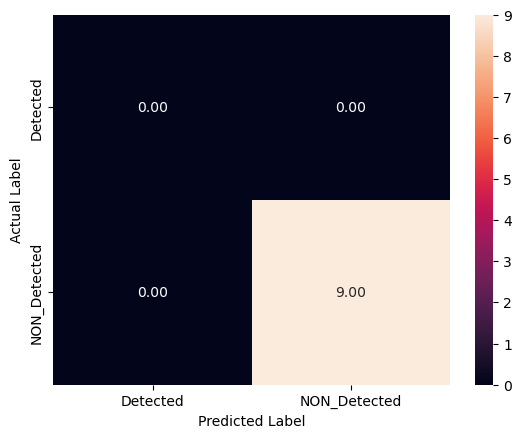

              precision    recall  f1-score   support

           0       0.69      0.35      0.46        26
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.67      0.67      0.67         3
           4       0.00      0.00      0.00         0
           6       0.76      0.55      0.64        53
           7       0.00      0.00      0.00         1
           8       0.65      0.45      0.53        73
           9       0.00      0.00      0.00         5
          10       0.60      0.33      0.43         9
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.59      0.38      0.46        69
          14       0.00      0.00      0.00         9
          15       0.71      0.71      0.71        92
          16       0.33      0.50      0.40         2
          17       0.00      0.00      0.00        21
          19       0.61    

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classif

In [83]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, labels=[1, 0])
    sn.heatmap(cm, annot=True, fmt='.2f',
              xticklabels=['Detected', 'NON_Detected'],
              yticklabels=['Detected', 'NON_Detected'])
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Example usage
draw_cm(y_test, y_pred)
print(classification_report(y_test, y_pred))


### without PCA

In [ ]:
df2

In [ ]:


plt.figure(figsize=(15, 18))  # Adjust the figure size as needed
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


#### normalize the value

In [ ]:
for col in df2.columns:
    print("\n\n")
    print(col)
    print(df2[col].unique())


In [ ]:
from sklearn.preprocessing import StandardScaler

cols = ['age', 'sex', 'TSH', 'T3', 'T4U']
scaler = StandardScaler()

for col in cols:
    df2[col] = scaler.fit_transform(df2[[col]])


#### splitting X and y values

In [ ]:
X = df2
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#### Model Selection

In [ ]:
from sklearn.metrics import accuracy_score

#### Decision Tree

In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


param_grid = {"criterion" : ["gini", "entropy"],
              "splitter" :   ["best", "random"],
              "max_depth" : [8, 16, 32, 64, 128, None],
              "max_features" : ['sqrt', 'log2', None]
             }

DTC = DecisionTreeClassifier(random_state = 0, max_features = "auto")

# run grid search
grid_search_ABC = GridSearchCV(DTC, param_grid=param_grid, scoring = 'accuracy')

grid_search_ABC.fit(X_train, y_train)

grid_search_ABC.best_params_

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'splitter': 'best'}

In [85]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=8,random_state = 0, max_features = None, 
                              criterion = 'entropy' )
tree.fit(X_train, y_train)
#clf = tree.fit(X_train,y_train)
treepredict = tree.predict(X_test)


In [86]:
accuracy_score(treepredict,y_test)
#print(f"Accuracy Score: {accuracy}")

0.8408719346049046

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your training and test sets
rf = RandomForestClassifier(max_depth=2, n_estimators=200)
rclf = rf.fit(X_train, y_train)
y_pred = rclf.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy Score: {accuracy}")


#### K-NN Classifier

In [87]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)


In [88]:
print(np.isnan(X_train).any())
print(np.isnan(X_test).any())


False
False


In [89]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your training and test sets
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train, y_train)
y_pred = knnclf.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.794550408719346


#### SVM

In [92]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

param_grid = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}

clf = SVC(random_state = 0)

# run grid search
grid_search_ABC = GridSearchCV(clf, param_grid=param_grid, scoring = 'accuracy')

grid_search_ABC.fit(X_train, y_train)

grid_search_ABC.best_params_

# Calculate and print the accuracy score
#accuracy = accuracy_score(y_pred, y_test)
#print(f"Accuracy Score: {accuracy}")


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'kernel': 'linear'}

In [94]:
clf = SVC(random_state = 0, kernel = 'linear')


clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [95]:
y_pred = clf.predict(X_test)
y_pred

array([15, 29, 15, ..., 29, 29, 29])

In [96]:
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)

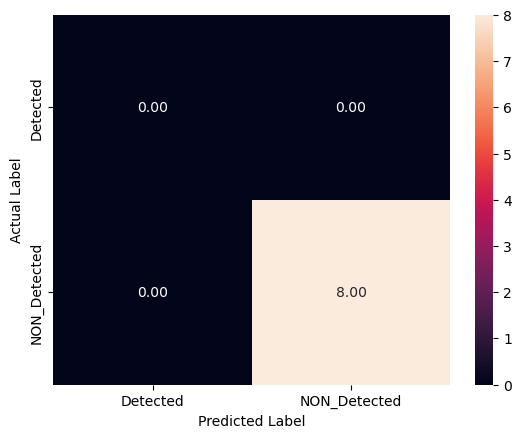

              precision    recall  f1-score   support

           0       0.67      0.31      0.42        26
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           6       0.85      0.66      0.74        53
           7       0.00      0.00      0.00         1
           8       0.67      0.44      0.53        73
           9       0.00      0.00      0.00         5
          10       1.00      0.22      0.36         9
          12       0.00      0.00      0.00         1
          13       0.56      0.33      0.42        69
          14       0.00      0.00      0.00         9
          15       0.68      0.82      0.74        92
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00        21
          19       0.58      0.29      0.39        24
          21       0.50      0.20      0.29         5
          22       0.00    

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, labels=[1, 0])
    sn.heatmap(cm, annot=True, fmt='.2f',
              xticklabels=['Detected', 'NON_Detected'],
              yticklabels=['Detected', 'NON_Detected'])
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Example usage
draw_cm(y_test, y_pred)
print(classification_report(y_test, y_pred))


In [98]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.8098092643051771
